# Preprocess the data

In [1]:
import pandas as pd

combined_data = pd.read_csv('Coswara-Data/combined_data.csv')
combined_data.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only the columns that are needed for the analysis.

In [2]:
combined_data = combined_data[['id', 'covid_status', 'test_status']]
combined_data

,id,covid_status,test_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN
...,...,...,...
2472,333NjqA1TfZJuICEdXSkPhVz0LA3,positive_asymp,p
2473,dpA0EeRrtJUeKJjEuf7BL0AeTJZ2,positive_mild,p
2474,UXhG3vgoxkWtd4Meky1nm0sRgMV2,positive_mild,p
2475,A5KW9PXraNgckln1gnNaJnX6DvB2,positive_moderate,p


In [3]:
combined_data['covid_status'].value_counts()

healthy                        1410
positive_mild                   426
positive_moderate               164
no_resp_illness_exposed         161
recovered_full                  145
positive_asymp                   89
resp_illness_not_identified      82
Name: covid_status, dtype: int64

In [4]:
combined_data['test_status'].value_counts()

p     679
na    312
n     257
Name: test_status, dtype: int64

First let's rename 'healthy' to 'negative'.

In [5]:
combined_data.loc[combined_data['covid_status'] == 'healthy', 'covid_status'] = 'negative'

The 'ut' label for the `test_status` column seems to be used to indicate that the test was not validated yet, matching with the 'under_validation' label in the `covid_status` column.

In [6]:
combined_data[combined_data['test_status'] == 'ut']['covid_status'].value_counts()

Series([], Name: covid_status, dtype: int64)

Let's remove the rows with this label.

In [7]:
combined_data = combined_data[combined_data['test_status'] != 'ut']
combined_data['test_status'].value_counts()

p     679
na    312
n     257
Name: test_status, dtype: int64

In [8]:
combined_data[combined_data['test_status'] == 'na']['covid_status'].value_counts()

negative                       197
no_resp_illness_exposed         83
resp_illness_not_identified     32
Name: covid_status, dtype: int64

We can observe that the 'na' label for the `test_status` column, used to indicate that the test was not performed, matches in most cases with the 'negative' label in the `covid_status` column.  
Let's used this label as a 'n' label for the `test_status` column.

In [9]:
combined_data.loc[combined_data['test_status'] == 'na', 'test_status'] = 'n'
combined_data['test_status'].value_counts()

p    679
n    569
Name: test_status, dtype: int64

Now let's update the labels for the `covid_status` column to only have two labels: 'positive' and 'negative'.

In [10]:
combined_data['covid_status'].value_counts()

negative                       1410
positive_mild                   426
positive_moderate               164
no_resp_illness_exposed         161
recovered_full                  145
positive_asymp                   89
resp_illness_not_identified      82
Name: covid_status, dtype: int64

In [11]:
combined_data.loc[combined_data['test_status'] == 'n', 'covid_status'] = 'negative'
combined_data.loc[combined_data['test_status'] == 'p', 'covid_status'] = 'positive'
combined_data['covid_status'].value_counts()

negative             1683
positive              679
positive_mild          72
recovered_full         20
positive_asymp         14
positive_moderate       9
Name: covid_status, dtype: int64

We can observe that some labels in the `covid_status` column are still present. Let's check what can be done with them.

In [12]:
combined_data[(combined_data['covid_status'] != 'negative') & (combined_data['covid_status'] != 'positive')]['test_status'].notna().sum()

0

`test_status` column is set to NaN for all the rows with a different label in the `covid_status` column than 'positive' or 'negative'.  
Let's switch 'positive_mild', 'positive_asymp' and 'positive_moderate' labels to 'positive', and 'recovered_full' to 'negative'.

In [13]:
combined_data.loc[combined_data['covid_status'] == 'positive_mild', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'positive_moderate', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'positive_asymp', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'recovered_full', 'covid_status'] = 'negative'
combined_data['covid_status'].value_counts()

negative    1703
positive     774
Name: covid_status, dtype: int64

For 'no_resp_illness_exposed' and 'resp_illness_not_identified', we can not deduced if the person is negative or not.  
Let's remove these rows.

In [14]:
combined_data = combined_data[(combined_data['covid_status'] == 'negative') | (combined_data['covid_status'] == 'positive')]
combined_data['covid_status'].value_counts()

negative    1703
positive     774
Name: covid_status, dtype: int64

In [15]:
combined_data['covid_status'].isna().sum()

0

We can observe that there is no NaN value in the `covid_status` column, we can now remove the `test_status` column.

In [16]:
combined_data = combined_data[combined_data.columns[~combined_data.columns.isin(['test_status'])]]
combined_data.head()

,id,covid_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,negative
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,negative
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,negative
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,negative
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,negative


In [17]:
len(combined_data)

2477

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined_data, test_size=0.2, random_state=42, stratify=combined_data['covid_status'])
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train['covid_status'])

train['covid_status'].value_counts(), val['covid_status'].value_counts(), test['covid_status'].value_counts()

(negative    1089
 positive     495
 Name: covid_status, dtype: int64,
 negative    273
 positive    124
 Name: covid_status, dtype: int64,
 negative    341
 positive    155
 Name: covid_status, dtype: int64)

# Transform audio files to mel-spectrograms

In [19]:
import os

audio_folder = 'Coswara-Data/'

train_ids = train['id'].values
val_ids = val['id'].values
test_ids = test['id'].values

train_audio_folder = []
val_audio_folder = []
test_audio_folder = []

for folder1 in os.listdir(audio_folder):
    if os.path.isdir(os.path.join(audio_folder, folder1)):
        for folder2 in os.listdir(os.path.join(audio_folder, folder1)):
            if folder2 in train_ids:
                train_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            elif folder2 in val_ids:
                val_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            elif folder2 in test_ids:
                test_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            
assert len(train_audio_folder) == len(train_ids)
assert len(val_audio_folder) == len(val_ids)
assert len(test_audio_folder) == len(test_ids)

In [20]:
import librosa
import skimage
import numpy as np

# Settings
n_mels = 64 # Number of Mel banks to generate
n_fft = 1024 # Interval we consider to apply FFT. Measured in # of samples
hop_length = 441 # Sliding window for FFT. Measured in # of samples
fmax = 22 # Maximum frequency we want to consider
sampling_rate = 44100 # 44.1kHz sampling rate
fmax = 22050

/home/leme/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [21]:
import torch
import torchaudio

def compute_SAD(sig,fs,threshold=0.0001,sad_start_end_sil_length=100, sad_margin_length=50):
    ''' Compute threshold based sound activity '''
    # Leading/Trailing margin
    sad_start_end_sil_length = int(sad_start_end_sil_length*1e-3*fs)
    # Margin around active samples
    sad_margin_length = int(sad_margin_length*1e-3*fs)

    sample_activity = np.zeros(sig.shape)
    sample_activity[np.power(sig,2)>threshold] = 1
    sad = np.zeros(sig.shape)
    for i in range(sample_activity.shape[0]):
        if sample_activity[i] == 1: sad[i-sad_margin_length:i+sad_margin_length] = 1
    sad[0:sad_start_end_sil_length] = 0
    sad[-sad_start_end_sil_length:] = 0
    return sad

def read_audio(file_path):
	try:
		s,fs = librosa.load(file_path)
		if np.mean(s)==0 or len(s)<1024:
			raise ValueError()
		# waveform level amplitude normalization
		s = s/np.max(np.abs(s))
		sad = compute_SAD(s,fs)
		s = s[np.where(sad==1)]
	except ValueError:
		s = None
		print("Read audio failed for "+file_path)		
	return s

def compute_logMelSpec(s):
	''' Feature preparation
	Steps:
	1. Apply feature extraction to waveform
	2. Convert amplitude to dB if required
	3. Append delta and delta-delta features
	'''
	F_extractor = torchaudio.transforms.MelSpectrogram(sample_rate=sampling_rate,
                                                                            n_fft=n_fft,
                                                                            n_mels=n_mels,
                                                                            f_max=fmax,
                                                                            hop_length=hop_length)
	F = F_extractor(torch.tensor(s))
	F = torchaudio.functional.amplitude_to_DB(F,multiplier=10,amin=1e-10,db_multiplier=0)
	Fo=F
	FD = torchaudio.functional.compute_deltas(F)
	Fo = torch.cat((F,FD),dim=0)
	FD = torchaudio.functional.compute_deltas(F)
	FDD = torchaudio.functional.compute_deltas(FD)
	Fo = torch.cat((F,FD,FDD),dim=0)
	return (Fo.T.numpy())


/home/leme/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def get_features(audio_folder, audio_name):
    audio = read_audio(os.path.join(audio_folder, audio_name))
    features = compute_logMelSpec(audio)
    return features

In [23]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def extract_melspectrogram(audio_folder, audio_name):
    audio, sr = librosa.load(os.path.join(audio_folder, audio_name))
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, fmax=fmax)
    melspectrogram = np.log(melspectrogram + 1e-9) # add small number to avoid log(0)
    return melspectrogram

def extract_melspectrogram_image(audio_folder, audio_name):
    melspectrogram = extract_melspectrogram(audio_folder, audio_name)
    img = scale_minmax(melspectrogram, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0)
    img = 255 - img
    skimage.io.imsave(os.path.join(audio_folder, audio_name + '.png'), img, check_contrast=False)
    return melspectrogram

In [24]:
from tqdm import tqdm

audio_names = ['cough-heavy.wav', 'cough-shallow.wav']

def get_data(df, audio_folder, audio_names):
    data = []
    for folder in tqdm(audio_folder):
        for audio_name in audio_names:
            try:
                data.append((extract_melspectrogram(audio_folder, audio_name), df[df['id'] == audio_folder.split('/')[-1]]['covid_status'].values[0]))
            except:
                continue
    data = np.array(data)
    return data

print('Extracting melspectrogram for train set...')
train_data = get_data(train, train_audio_folder, audio_names)
np.save('train_data.npy', train_data)
print('Extracting melspectrogram for validation set...')
val_data = get_data(val, val_audio_folder, audio_names)
np.save('val_data.npy', val_data)
print('Extracting melspectrogram for test set...')
test_data = get_data(test, test_audio_folder, audio_names)

Extracting melspectrogram for train set...


  0%|          | 0/1584 [00:00<?, ?it/s]/home/leme/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
100%|██████████| 1584/1584 [11:05<00:00,  2.38it/s]


Extracting melspectrogram for validation set...


100%|██████████| 397/397 [02:24<00:00,  2.75it/s]


Extracting melspectrogram for test set...


  9%|▊         | 43/496 [00:17<02:57,  2.56it/s]/home/leme/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
100%|██████████| 496/496 [03:09<00:00,  2.61it/s]


# Create CNN model for classification

In [26]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

: 

: 

### Get the labels

In [ ]:
train_labels = np.array([label for _, label in train_data])
val_labels = np.array([label for _, label in val_data])
test_labels = np.array([label for _, label in test_data])

### Get and resize the mel-spectrograms

In [ ]:
def resize_melspectrogram(melspectrogram):
    return skimage.transform.resize(melspectrogram, (128, 128))

train_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in train_data])
val_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in val_data])
test_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in test_data])

### Binarize the labels

In [ ]:
train_labels = (train_labels == 'positive').astype(np.int)
val_labels = (val_labels == 'positive').astype(np.int)
test_labels = (test_labels == 'positive').astype(np.int)

/tmp/ipykernel_10284/3543122232.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_labels = (train_labels == 'positive').astype(np.int)
/tmp/ipykernel_10284/3543122232.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
D

### Normalize the melspectrograms

In [ ]:
train_melspectrogram = train_melspectrogram / train_melspectrogram.max()
val_melspectrogram = val_melspectrogram / val_melspectrogram.max()
test_melspectrogram = test_melspectrogram / test_melspectrogram.max()

In [ ]:
# Train the model
epochs = 10
history = model.fit(train_melspectrogram, train_labels, batch_size=32, epochs=epochs, validation_data=(val_melspectrogram, val_labels))

Epoch 1/10
99/99 [==============================] - 16s 154ms/step - loss: 0.6611 - accuracy: 0.6734 - val_loss: 0.6015 - val_accuracy: 0.6877
Epoch 2/10
99/99 [==============================] - 12s 123ms/step - loss: 0.6040 - accuracy: 0.6899 - val_loss: 0.5968 - val_accuracy: 0.7053
Epoch 3/10
99/99 [==============================] - 12s 122ms/step - loss: 0.5921 - accuracy: 0.7004 - val_loss: 0.5717 - val_accuracy: 0.7317
Epoch 4/10
99/99 [==============================] - 11s 109ms/step - loss: 0.5727 - accuracy: 0.7213 - val_loss: 0.5741 - val_accuracy: 0.7217
Epoch 5/10
99/99 [==============================] - 11s 116ms/step - loss: 0.5441 - accuracy: 0.7422 - val_loss: 0.5665 - val_accuracy: 0.7204
Epoch 6/10
99/99 [==============================] - 12s 124ms/step - loss: 0.5251 - accuracy: 0.7530 - val_loss: 0.5719 - val_accuracy: 0.7242
Epoch 7/10
99/99 [==============================] - 12s 120ms/step - loss: 0.5008 - accuracy: 0.7644 - val_loss: 0.5755 - val_accuracy: 0.7166

Text(0.5, 1.0, 'Training and Validation Loss')

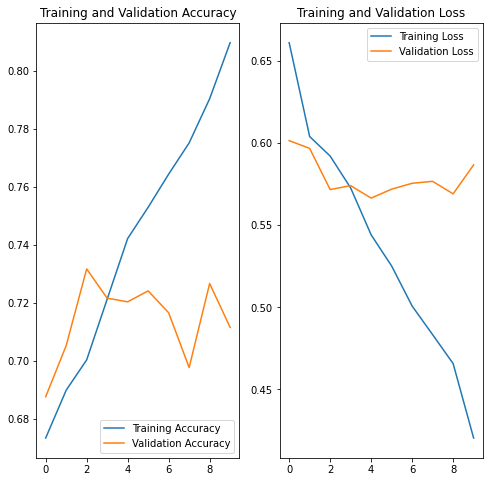

In [ ]:
# Plot the training and validation accuracy/loss per epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
# Evaluate the model
model.evaluate(test_melspectrogram, test_labels)

31/31 [==============================] - 1s 34ms/step - loss: 0.6100 - accuracy: 0.7055


[0.609970211982727, 0.7054656147956848]

<AxesSubplot:>

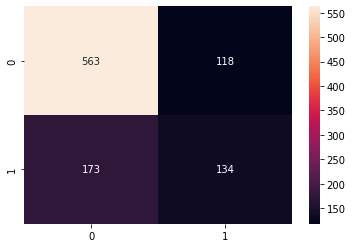

In [ ]:
# Predict the labels
predictions = model.predict(test_melspectrogram)

# Confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
# Save the model
model.save('covid_cough_classifier.h5')